#Đỗ Minh Triều_19146283_Lớp tối thứ 6_Phân loại 4 loại bánh

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import pandas as pd

In [8]:
load_train_data='/content/drive/MyDrive/Colab Notebooks/KiemtraAI/cake'

In [9]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255,validation_split=0.2,rotation_range=10, 
                            zoom_range = 0.1,  
                             width_shift_range=0.1, 
                             height_shift_range=0.1,
                             brightness_range=(0.9, 1.1))

In [12]:
train_data=train.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=4,
    class_mode='categorical',
    subset = 'training',
    shuffle = True
   )
validation_set=validation.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=4,
    class_mode='categorical',
    subset = 'validation',
    shuffle = True
    )

Found 79 images belonging to 4 classes.
Found 15 images belonging to 4 classes.


In [13]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'Bánh da lợn': 0, 'Bánh hỏi': 1, 'Bánh ướt': 2, 'Bánh xèo': 3}
{'Bánh da lợn': 0, 'Bánh hỏi': 1, 'Bánh ướt': 2, 'Bánh xèo': 3}


In [14]:
model = Sequential()
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150,150,3)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])
history=model.fit(train_data,batch_size=4,epochs=20,verbose=1,validation_data=validation_set)

Epoch 1/20
20/20 [==============================] - 36s 2s/step - loss: 20.4228 - accuracy: 0.3038 - val_loss: 1.3795 - val_accuracy: 0.3333
Epoch 2/20
20/20 [==============================] - 33s 2s/step - loss: 1.3581 - accuracy: 0.3924 - val_loss: 1.2984 - val_accuracy: 0.4000
Epoch 3/20
20/20 [==============================] - 33s 2s/step - loss: 1.6084 - accuracy: 0.4051 - val_loss: 1.3431 - val_accuracy: 0.4667
Epoch 4/20
20/20 [==============================] - 34s 2s/step - loss: 1.6265 - accuracy: 0.4937 - val_loss: 1.3103 - val_accuracy: 0.4000
Epoch 5/20
20/20 [==============================] - 45s 2s/step - loss: 1.4066 - accuracy: 0.5443 - val_loss: 1.3433 - val_accuracy: 0.3333
Epoch 6/20
20/20 [==============================] - 32s 2s/step - loss: 1.2559 - accuracy: 0.5570 - val_loss: 1.2995 - val_accuracy: 0.6000
Epoch 7/20
20/20 [==============================] - 32s 2s/step - loss: 1.4675 - accuracy: 0.4684 - val_loss: 1.3641 - val_accuracy: 0.6000
Epoch 8/20
20/20 [=

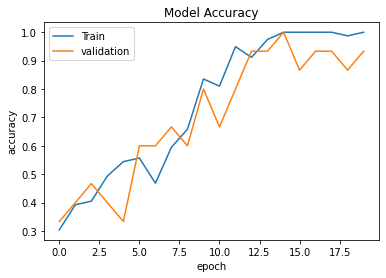

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc = 'upper left')
plt.show()

In [20]:
model.save('/content/drive/MyDrive/Colab Notebooks/KiemtraAI/phanloaibanh.h5')

array([0])

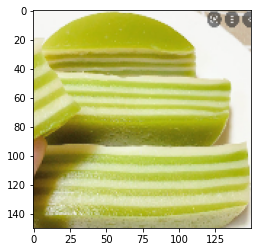

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/banhdalon.PNG', target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([1])

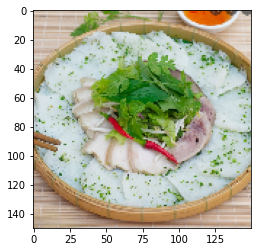

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/banhhoi.PNG', target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([2])

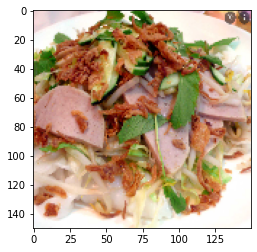

In [23]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/banhuot.PNG', target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([3])

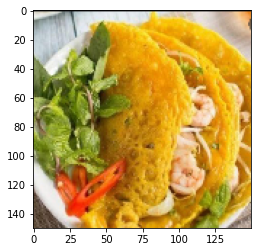

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/banhxeo.PNG', target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

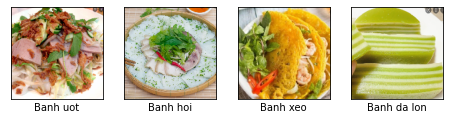

In [24]:
cake={0:'Banh da lon',
       1:'Banh hoi',
       2:'Banh uot',
       3:'Banh xeo',
       4:'Banh xeo'}
import os
filenames=os.listdir("/content/drive/MyDrive/Colab Notebooks/KiemtraAI/test")
df=pd.DataFrame({'filename':filenames})
url='/content/drive/MyDrive/Colab Notebooks/KiemtraAI/test/'+df['filename']

plt.figure(figsize=(20,20))
for i in range(df.shape[0]):
  plt.subplot(10,10,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  img=load_img(url[i],target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.reshape(1,150,150,3)
  img=img/255.0
  img_pred = model.predict(img)
  plt.xlabel(cake[np.argmax(img_pred)])
plt.show()